## Suppose we use 4 features
## and want to classify to 5 groups
![Perceptron](https://phyblas.hinaboshi.com/rup/nayuki/umaki/f01.png)

### $w$ is not just vector now it's matrix shape = (4x5)
#### $
\begin{align}
\vec{a}_i &= \mathbf{w}^T \cdot \vec{x}_i + \vec{b} \\
\begin{bmatrix}
a_{i,0} \\\\ a_{i,1} \\\\ \vdots \\\\ a_{i,m_1-1}
\end{bmatrix} &=
\begin{bmatrix}
w_{0,0} & w_{1,0} & \cdots & w_{m_0-1,0} \\\\
w_{0,1} & w_{1,1} & \cdots & w_{m_0-1,1} \\\\
\vdots & \vdots & \ddots & \vdots \\\\
w_{0,m_1-1} & w_{1,m_1-1} & \cdots & w_{m_0-1,m_1-1}
\end{bmatrix} \cdot
\begin{bmatrix}
x_{i,0} \\\\ x_{i,1} \\\\ \vdots \\\\ x_{i,m_0-1}
\end{bmatrix} +
\begin{bmatrix}
b_{0} \\\\ b_{1} \\\\ \vdots \\\\ b_{m_1-1}
\end{bmatrix} \\
&=
\begin{bmatrix}
\sum_{j=0}^{m_0-1}w_{j,0} x_{i,j} + b_0 \\\\
\sum_{j=0}^{m_0-1}w_{j,1} x_{i,j} + b_1 \\\\
\vdots \\\\
\sum_{j=0}^{m_0-1}w_{j,m_1-1} x_{i,j} + b_{m_1-1}
\end{bmatrix}
\end{align}
$

# $$
\begin{align}
\pmb{a} = \mathbf{x} \cdot \textbf{w} + \vec{b}^T
\end{align}
$$
### $
\begin{align}
\pmb{a} =
\begin{bmatrix}
a_{0,0} & a_{0,1} & \cdots & a_{0,m_0-1} \\\\
a_{1,0} & a_{1,1} & \cdots & a_{1,m_1-1} \\\\
\vdots & \vdots & \ddots & \vdots \\\\
a_{n-1,0} & a_{n-1,1} & \cdots & a_{n-1,m_1-1}
\end{bmatrix}
\end{align}
$

### $$
\begin{align}
\mathbf{x} \cdot \textbf{w} + \vec{b}^T &=
\mathbf{x} \cdot \textbf{w} +
\begin{bmatrix}
b_0 & b_1 & \cdots & b_{m_1-1}
\end{bmatrix} \\ &=
\mathbf{x} \cdot \textbf{w} +
\begin{bmatrix}
b_{0} & b_{1} & \cdots & b_{m_1-1} \\\\
b_{0} & b_{1} & \cdots & b_{m_1-1} \\\\
\vdots & \vdots & \ddots & \vdots \\\\
b_{0} & b_{1} & \cdots & b_{m_1-1}
\end{bmatrix}
\end{align}
$$

In [2]:
import numpy as np
a = np.random.randint(-9,9,[4,5])
print(a)
# Axis = 1 means row
print(a.max(axis=1))
print(a.argmax(axis=1)) # หรือ a.argmax(axis=1)

[[ 4  6 -6 -4  4]
 [ 6 -2  3  7 -9]
 [ 0 -3  8 -2  3]
 [-3 -1  3 -5 -8]]
[6 7 8 3]
[1 3 2 2]


## Softmax's for features >=2 
## Sigmoid's features= 2
### $$
\begin{align}
\mathbf{h} = \mathbf{softmax}(\mathbf{a})= \frac{\exp(\pmb{a})}{\sum_{k=0}^{m_1-1}\exp(\vec{a}_{i,k})}
\end{align}
$$

In [268]:
def softmax(x):
    exp_x = np.exp(x.T-x.max(1))
    return (exp_x/exp_x.sum(0)).T

a = np.random.randint(-9,9,[4,3])
print(a)

# Activation func
h = softmax(a)
print(h)
print(h.sum(1)) # sum of probability = 1

[[-8 -1  2]
 [ 6  2 -8]
 [ 2 -4 -2]
 [ 7  0  6]]
[[4.32449282e-05 4.74238222e-02 9.52532933e-01]
 [9.82012988e-01 1.79861953e-02 8.16572002e-07]
 [9.79629207e-01 2.42825803e-03 1.79425348e-02]
 [7.30571551e-01 6.66195022e-04 2.68762254e-01]]
[1. 1. 1. 1.]


In [178]:
print(h.T)

[[4.49175897e-06 9.46499123e-01 1.14195199e-01 9.92408247e-01]
 [2.68940213e-01 4.71234165e-02 4.20100661e-02 6.68679417e-03]
 [7.31055295e-01 6.37746092e-03 8.43794734e-01 9.04959183e-04]]


# Cross entropy loss
## $$
\begin{align}
J &= -\frac{1}{n}\sum_{i=0}^{n-1} \sum_{k=0}^{m_1-1} z_{i,k} \ln h_{i,k} \\
&= -\frac{1}{n}\textbf{sum}(\mathbf{z} \ln \mathbf{h})
\end{align}
$$
## One Hot ?

In [269]:
def ha_1h(z,n):
    return (z[:,None]==range(n))
cal_onehot = ha_1h

z = np.random.randint(0,5,3)
print(z); print()
print(ha_1h(z,5)); print()
print(ha_1h(z,5).astype(int)) # เปลี่ยนเป็นเลข 1 และ 0


[2 1 1]

[[False False  True False False]
 [False  True False False False]
 [False  True False False False]]

[[0 0 1 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]


![CG](https://phyblas.hinaboshi.com/rup/nayuki/umaki/f02.png)

#### $
\begin{align}
\frac{\partial J}{\partial \mathbf{h}} &= -\frac{\mathbf{z}}{n\mathbf{h}} \\
\frac{\partial \mathbf{h}}{\partial \pmb{a}} &= \frac{\mathbf{h}(\mathbf{z}-\mathbf{h})}{\mathbf{z}} \\
\mathbf{g}_a &= \frac{\partial J}{\partial \pmb{a}} = \frac{1}{n}(\mathbf{h}-\mathbf{z}) \\
\frac{\partial \pmb{a}}{\partial \textbf{w}} &= \mathbf{x} \\
\frac{\partial \pmb{a}}{\partial \vec{b}^T} &= \vec{1}_{n} = \begin{bmatrix} 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix} \\
\mathbf{g}_w &= \frac{\partial J}{\partial \textbf{w}} = \mathbf{x}^T \cdot \mathbf{g}_a \\
\vec{g}_b &= \frac{\partial J}{\partial \vec{b}} = \mathbf{g}_a^T \cdot \vec{1}_{n} = \sum_{i=0}^{n-1}\mathbf{g}_{a,i}
\end{align}
$

![CG](https://phyblas.hinaboshi.com/rup/nayuki/umaki/f03.png)

## $$
\begin{align}
\Delta \mathbf{w} &= -\eta \mathbf{g}_w \\
\Delta \vec{b} &= -\eta \vec{g}_b
\end{align}
$$

# Classify features >= 2 

In [229]:
import numpy as np
import matplotlib.pyplot as plt

In [267]:
def cal_cross_entropy(z, h):
    return -(np.log(h[z] + 1e-10)).mean()

class NN:
    def __init__(self, eta):
        self.eta = eta
        
    def cal_a(self, X):
        return np.dot(X, self.w) + self.b
        
    def learn(self, X, z, n_learns):
        self.n_groups = int(z.max() + 1) # z = [0,1], z = [0,1,2,3]
        Z = cal_onehot(z, self.n_groups)
        self.w = np.zeros([X.shape[1], self.n_groups]) # like np.zeros([5,3])
        self.b = np.zeros(self.n_groups)
        self.entropy = []
        self.score = []
        
        for i in range(n_learns):
            a = self.cal_a(X)
            h = softmax(a)
            J = cal_cross_entropy(Z, h)
            g_a = (h-Z)/len(z)
            
            self.w -= self.eta * np.dot(X.T, g_a)
            self.b -= self.eta * g_a.sum(axis=0) # sum col
            
            self.entropy.append(J)
            score = (h.argmax(axis=1) == z).mean()
            self.score.append(score)
        
    def predict(self, X):
        return self.cal_a(X).argmax(axis=1)
            
        
# Using z = group classified  

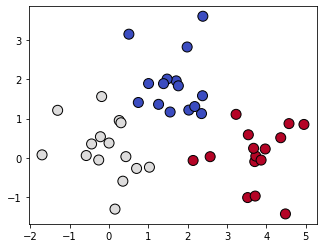

In [270]:
np.random.seed(2)
X = np.random.normal(0, .7, [45, 2])
X[:15] += 2 # Blue group
X[30:, 0] += 4 # Red to right
z = np.arange(3).repeat(15)
plt.axes(aspect=1)
plt.scatter(X[:, 0], X[:, 1], 100, c=z, edgecolor='k', cmap='coolwarm')
plt.show()

1.7082695068161706
[2 0]


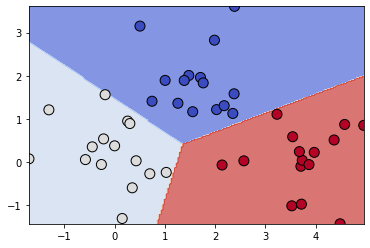

In [277]:
nn = NN(eta=.1)
nn.learn(X, z, n_learns=250)

k = np.linspace(X[:, 0].min(), X[:, 0].max(), 200)
v = np.linspace(X[:, 1].min(), X[:, 1].max(), 200)
mx, my = np.meshgrid(k, v)
mX = np.array([mx.ravel(), my.ravel()]).T
mz = nn.predict(mX).reshape(200, -1)

plt.contourf(mx, my, mz, cmap='coolwarm', alpha=.7)
plt.scatter(X[:, 0], X[:, 1], 100, c=z, edgecolor='k', cmap='coolwarm')


print(X[0,0])
print(nn.predict(X[0,0]))


plt.show()

        

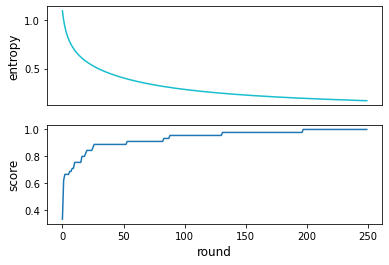

In [257]:
kw = dict(size=12)

plt.subplot(211,xticks=[])
plt.plot(nn.entropy,'C9')
plt.ylabel('entropy', **kw)

plt.subplot(212)
plt.plot(nn.score, )
plt.ylabel('score', **kw)

plt.xlabel('round', **kw)
plt.show()

# Classify Image to 5 groups
![Img](https://phyblas.hinaboshi.com/rup/nayuki/umaki/f07.png)

0.811


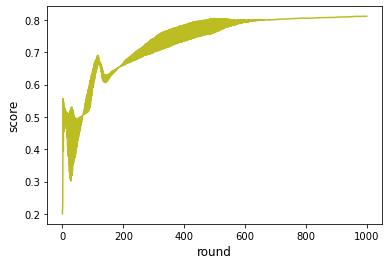

In [286]:
from glob import glob

uri = '../../SAMPLE DATA/ruprang-raisi-25x25x1000x5/*/*.png'
d = 25
X_ = np.array([plt.imread(x) for x in sorted(glob(uri))])
X = X_.reshape(-1, d*d)
z = np.arange(5).repeat(1000)

nn_img_classifier = NN(eta=.02)
nn_img_classifier.learn(X, z, n_learns=1000)
print(nn_img_classifier.score[-1])

plt.plot(nn_img_classifier.score, 'C8')
plt.ylabel('score', size=12)
plt.xlabel('round', size=12)
plt.show()

In [291]:
print(X[0].shape)
X.shape

(625,)


(5000, 625)

In [283]:
nn_img_classifier.w.shape

(625, 5)

# Just 80% precision ?? See CONFUSION MATRIX

In [303]:
def confusion_matrix(z1, z2):
    n = max(z1.max(), z2.max()) + 1
    
    a = (z1 == np.arange(n)[:, None]).astype(int)
    b = (z2[:, None] == np.arange(n)).astype(int)
    
    return np.dot(a, b)
print(confusion_matrix(nn_img_classifier.predict(X), z))
# print(z)
# print(z.shape)
# nn_img_classifier.predict(X)
# np.unique(nn_img_classifier.predict(X))

[[699  10 214  18   6]
 [ 33 891 149   0  61]
 [265  75 605  55   0]
 [  3  10  22 927   0]
 [  0  14  10   0 933]]
